In [0]:
!pip3 install simpy

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [0]:
import random

import simpy

## Quantos clientes vamos simular?

In [0]:
NEW_CUSTOMERS = 50  # Total number of customers

## Qual o intervalo de chegada entre dois clientes?

In [0]:
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds

## O quão pacientes são os clientes?

In [0]:
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience

## Duração do atendimento

In [0]:
TIME_IN_BANK = 12   # in seconds

## Um cliente

In [0]:
obs_wait = []
obs_renege = []
def customer(env, counter, time_in_bank):
    arrive = env.now
    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        results = yield req | env.timeout(patience)
        wait = env.now - arrive
        if req in results:
            obs_wait.append(wait)
            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
        else:
            obs_renege.append(wait)

## Um gerador de clientes

In [0]:
def source(env, number, interval, counter):
    for i in range(number):
        c = customer(env, counter, time_in_bank=TIME_IN_BANK)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)

# Simulação

In [0]:
RANDOM_SEED = 42

random.seed(RANDOM_SEED)
env = simpy.Environment()

counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

In [0]:
import matplotlib.pylab as plt

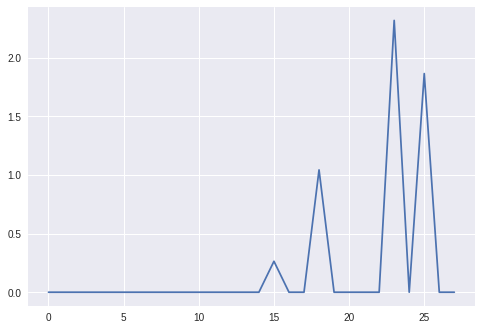

In [0]:
f, ax = plt.subplots(1, 1)
ax.plot(obs_wait)
plt.show()

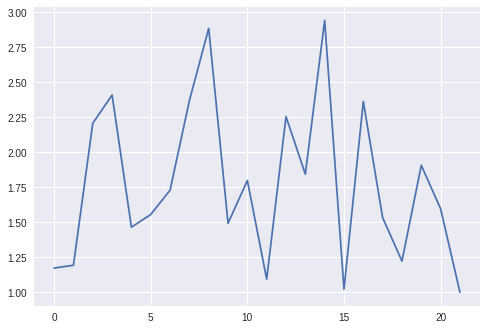

In [0]:
f, ax = plt.subplots(1, 1)
ax.plot(obs_renege)
plt.show()

In [0]:
len(obs_renege)

22

In [0]:
len(obs_wait)

28